In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import statsmodels.imputation.mice as mice

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Y_train = train.iloc[:, 1]
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()  # --> lose data: Age, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

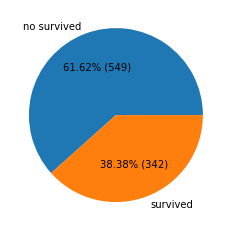

In [5]:
# Survive vs No Survived
labels = 'no survived', 'survived'
size = Y_train.value_counts()
plt.pie(size, labels=labels, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*size.sum()))
plt.show()

In [6]:
train = train.drop(['SibSp', 'Parch'], axis=1)
test = test.drop(['SibSp', 'Parch'], axis=1)

In [7]:
print(train['Embarked'].unique())
train['Embarked'] = train['Embarked'].map({ 'S':0, 'C':1, 'Q':2 })
test['Embarked'] = test['Embarked'].map({ 'S':0, 'C':1, 'Q':2 })

['S' 'C' 'Q' nan]


In [8]:
print(train['Sex'].unique())
train['Sex'] = train['Sex'].map({ 'male':0, 'female':1 }) 
test['Sex'] = test['Sex'].map({ 'male':0, 'female':1 }) 

['male' 'female']


In [9]:
train = train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
test = test.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [10]:
train = mice.MICEData(train).data
test = mice.MICEData(test).data

In [11]:
std = StandardScaler()
train = std.fit_transform(train)
test = std.fit_transform(test)

In [12]:
# pca = PCA(n_components=None, random_state=1234)
# train_pca = pca.fit_transform(train)
# test_pca = pca.fit_transform(test)

In [13]:
# xgbr = XGBClassifier()
# xgbr.fit(train_pca, Y_train)
# Y_pred = xgbr.predict(test_pca)

In [14]:
# xgbc = XGBClassifier()
# xgbc.fit(train, Y_train)
# Y_pred = xgbc.predict(test)

In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(train, Y_train)
Y_pred = mlp.predict(test)

c:\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
index = pd.RangeIndex(start=892, stop=1310, step=1)
submission = pd.DataFrame(
    {'PassengerId' : index,
     'Survived'    : Y_pred}
)
submission.to_csv('titanic90.csv', index=False)